---
Oleh: Zakiul Fahmi Jailani, MSc.

Disampaikan untuk Mahasiswa/i Teknologi Informasi UIN Ar-Raniry Banda Aceh, semester genap tahun 2022.

Kali ini kita akan mempelajari bagaimana membangun sebuah model JST paling sederhana.

Nanti Anda akan bertemu dengan istilah-istilah penting dalam JST. Untuk sementara, definisi dari istilah-istilah itu akan kita simpan dulu untuk dijelaskan nanti.

Beberapa istilah-istilah yang dimaksud adalah:
- 

Seperti biasa, import beberapa library yang dibutuhkan dalam model ini:
- matplotlib
- numpy
- sklearn

In [ ]:
# Meng-import library-library yang dibutuhkan
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Menampilkan plot gambar dan mengatur ukuran gambar secara default
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## A. Generate data

Dataset yang kita gunakan kali ini adalah data yang sudah tersedia di library sklearn. Nama dataset nya adalah `make_moons`. Kita bisa dengan mudah memanggil data tersebut yaitu dengan memanggil fungsi `.dataset.make_moons` pada library sklearn.

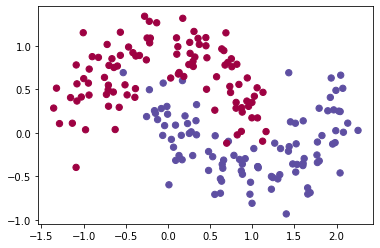

In [ ]:
# Membuat data dan menge-plot gambarnya
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20) # apa parameter yang digunakan disini?
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

Dapat kita lihat, dataset yang kita panggil berisi dua buah kelas, yang ditandai dengan warna merah dan biru. Karena ini adalah contoh data, maka kita bebas memberi label dari dua kelas data tersebut. Misalkan, kita bisa mengatakan bahwa data merah merepresentasikan pasien yang terdiagnosis penyakit, dan data biru adalah pasien yang sehat.

Tujuan kita pada kali ini adalah untuk melatih data menggunakan algoritma classifier agar bisa memprediksi kemana sebuah data pasien baru nantinya akan dimasukkan? Apakah ke data merah? atau data biru? Model algoritma classifier yang kita buat hari ini nantinya memudahkan manusia jika ternyata ada 1000 data pasien masuk setiap harinya.

Jika dilihat dari gambar diatas, dua kelas data tersebut bercampur, dan tidak terpisah dengan jelas. Ada data merah yang berada di wilayah biru, dan sebaliknya. Jika seperti itu, maka kita tidak bisa menarik garis yang jelas menggunakan algoritma Logistic Regression yang telah kita pelajari sebelumnya.

Tidak percaya? ayo kita coba:



## B. Mengklasifikasi data make_moons menggunakan Logistic Regression

In [ ]:
# Melatih data dengan algoritma Logistic Regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [ ]:
# Fungsi untuk untuk plotting hasil training dan prediksi
def plot_decision_boundary(pred_func):
    # Konfigurasi nilai minimum dan maksimum
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Prediksi nilai untuk keseluruhan
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting tren data training
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

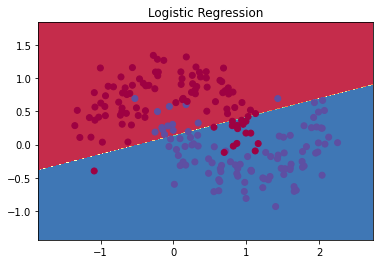

In [ ]:
# Plot logistic regression
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

Gambar diatas menunjukkan bagaimana algoritma Logistic Regression berusaha memisahkan mana data biru dan mana data merah dengan sebuah garis lurus. Namun, tetap ada data merah yang tergolong data biru, dan sebaliknya. Ini menunjukkan bahwa Logistic Regression tidak cocok digunakan untuk memisahkan dataset `make_moons` ini.

## C. Jaringan Saraf Tiruan Sederhana

Sekarang, kita akan mencoba melatih data tersebut menggunakan sebuah Jaringan Saraf Tiruan yang paling sederhana (Perceptron) yang terdiri dari:
- 3 lapisan:
  - 1 layer (lapisan) input
  - 1 layer tersembunyi (hidden layer)
  - 1 layer output
- Jumlah titik input ditentukan sesuai dengan besar dimensi yang kita miliki yaitu: 2
- Begitu juga dengan jumlah titik output yang sesuai dengan jumlah titik input yaitu: 2

Berikut kira-kira gambaran model JST yang akan kita buat:
![](https://drive.google.com/uc?id=1iwyiJSgIQPXqig4Fcmg5kH2bIosiIsaz)

Selain itu, kita juga perlu memerhatikan beberapa hal lain:
- Berapa hidden layer (lapisan tersembunyi) yang kita perlukan?
  - Jawab: Lebih banyak lebih baik. Namun, lebih banyak hidden layer yang kita gunakan, maka kekuatan komputer kita juga harus lebih kuat pula.
  - Untuk saat ini, kita akan coba satu hidden layer saja dulu.
- Fungsi Aktivasi (Activation Function) apa yang akan kita gunakan?
  - Kita akan menggunakan: Fungsi Aktivasi TANH
  - Berbagai macam fungsi aktivasi ini akan kita bahas nanti.
- Fungsi Rugi (Loss Function) apa yang akan kita gunakan?
  - Kita akan menggunakan: Cross Entropy Loss / Negative Log Likelihood.
  - Tujuan dari Loss Function: mengukur kesalahan yang dilakukan oleh model JST antara hasil output prediksi dan nilai target yang diberikan.
  - Semakin rendah nilai Loss Function (nilai kerugian), maka akan semakin baik model JST yang telah kita bangun.
- Istilah-istilah:
  - Overfitting: Suatu keadaan dimana model JST kita berusaha mempelajari seluruh data terlalu detil sehingga juga termasuk mempelajari noise yang ada dalam data tersebut dan berusaha mengikutsertakan semua data (termasuk noise) kedalam hasil akhir
  -Underfitting: Suatu keadaan dimana model JST tidak berhasil mempelajari data yang kita miliki dengan baik. Akibatnya nanti, model JST tidak bisa mengklasifikasikan data baru yang akan masuk.

![](https://drive.google.com/uc?id=1ixNQfu7AMns6rxq3oJ9-9n9dvQnfeMPb)

In [ ]:
training_set_size = len(X) # Besar training set 
nn_input_dim = 2 # dimensi input layer (lapisan input) 
nn_output_dim = 2 # dimensi output layer (lapisan output)
learning_rate = 0.01 
regularization = 0.01

In [ ]:
# Menghitung Loss Function (Fungsi Rugi)
def loss_func(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1) # menggunakan TANH
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Menghitung Loss Function (Fungsi Rugi)
    correct_logprobs = -np.log(probs[range(training_set_size), y])
    data_loss = np.sum(correct_logprobs)
    data_loss += regularization / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./training_set_size * data_loss

Membuat sebuah fungsi `def predict` untuk menghitung prediksi output:

In [ ]:
# Prediksi output (0 atau 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return np.argmax(probs, axis = 1)

Membuat fungsi untuk melatih JST. Fungsi ini menggunakan Gradient Descent:

In [ ]:
# Membangun model dan mengembalikan hasil model
# - nn_hdim: jumlah neuron pada lapisan tersembunyi
# - num_gd: jumlah yang melewati training data 
# - print_loss: jika True akan menampilkan nilai rugi setiap iterasi per 1000 kali
def build_model(nn_hdim, num_gd=20000, print_loss=False):
    
    # Inisialisasi parameter.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # mengembalikan hasil model
    model = {}
    
    # Gradient descent untuk setiap batch
    for i in range(0, num_gd):

        # Propagasi ke depan
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Propagasi ke belakang
        delta3 = probs
        delta3[range(training_set_size), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # regularization
        dW2 += regularization * W2
        dW1 += regularization * W1

        # perbarui parameter gradient descent
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        
        # Memberikan nilai parameter baru
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Menampilkan nilai fungsi rugi (opsional)
        if print_loss and i % 1000 == 0:
          print("Nilai Loss Function setelah iterasi ke %i: %f" %(i, loss_func(model)))
    
    return model

## D. JST sederhana dengan 3 hidden layer (lapisan tersembunyi) 

Nilai Loss Function setelah iterasi ke 0: 0.432387
Nilai Loss Function setelah iterasi ke 1000: 0.068947
Nilai Loss Function setelah iterasi ke 2000: 0.068888
Nilai Loss Function setelah iterasi ke 3000: 0.070752
Nilai Loss Function setelah iterasi ke 4000: 0.070748
Nilai Loss Function setelah iterasi ke 5000: 0.070751
Nilai Loss Function setelah iterasi ke 6000: 0.070754
Nilai Loss Function setelah iterasi ke 7000: 0.070756
Nilai Loss Function setelah iterasi ke 8000: 0.070757
Nilai Loss Function setelah iterasi ke 9000: 0.070758
Nilai Loss Function setelah iterasi ke 10000: 0.070758
Nilai Loss Function setelah iterasi ke 11000: 0.070758
Nilai Loss Function setelah iterasi ke 12000: 0.070758
Nilai Loss Function setelah iterasi ke 13000: 0.070758
Nilai Loss Function setelah iterasi ke 14000: 0.070758
Nilai Loss Function setelah iterasi ke 15000: 0.070758
Nilai Loss Function setelah iterasi ke 16000: 0.070758
Nilai Loss Function setelah iterasi ke 17000: 0.070758
Nilai Loss Function set

Text(0.5, 1.0, 'Plot dengan lapisan tersembunyi sebanyak 3')

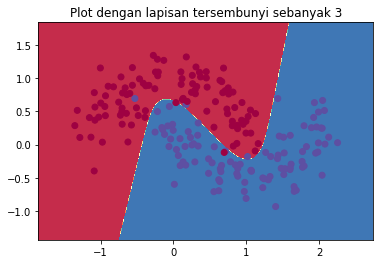

In [ ]:
# Membangun model jaringan dengan tiga buah lapisan tersembunyi
model = build_model(3, print_loss=True)

# menampilkan plot
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Plot dengan lapisan tersembunyi sebanyak 3")

Hasilnya cukup baik. Model JST yang telah kita dibangun ini bisa menentukan batas antar data dan membuat daerah merah serta daerah biru.

## E. Mencoba dengan jumlah hidden layer (lapisan tersembunyi) yang berbeda

Tadi diatas, kita telah mencoba menggunakan 3 hidden layer (lapisan tersembunyi. Bagaimana jika kita tambahkan hidden layer nya lebih banyak lagi? Mari kita coba dengan hidden layer sebanyak 1, 2, 3, 4, 5, 20 hingga 50: 

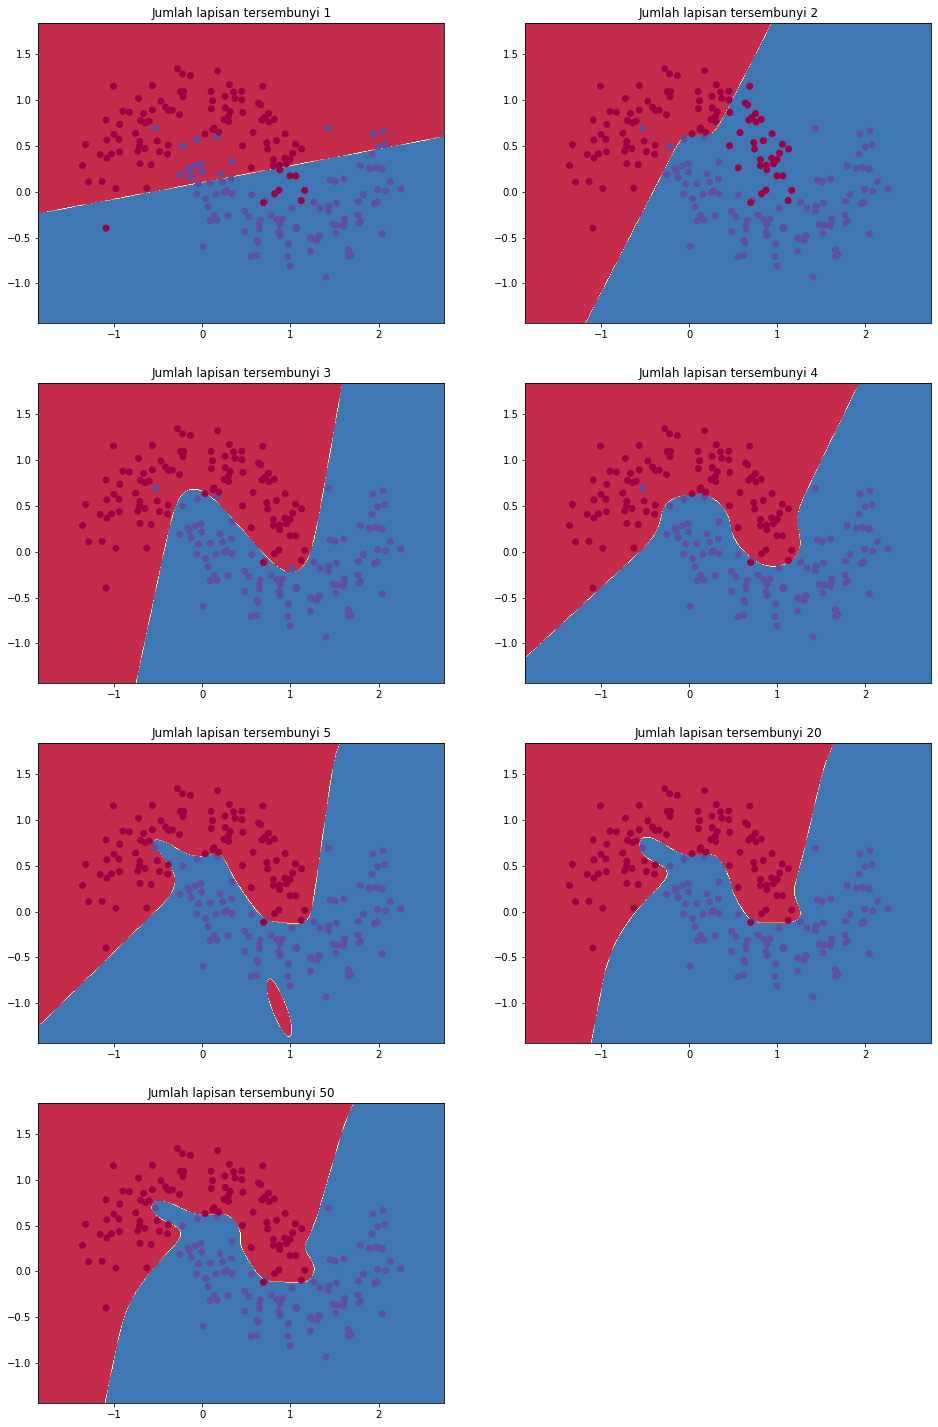

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Jumlah lapisan tersembunyi %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

Dari hasil diatas kita dapat melihat ternyata jika dimensi hidden layer (lapisan tersembunyi) nya terlalu banyak, hasil klasifikasi dari model JST kita berakhir Overfitting.

Oleh karena itu, hasil dengan 3 dimensi hidden layer (lapisan tersembunyi) masih lebih bagus dibandingkan dengan jumlah hidden layer lainnya.

## TUGAS

Jawablah pertanyaan-pertanyaan berikut dengan ditulis tangan:
- 1. Jelaskan pengertian sederhana dari Jaringan Saraf Tiruan!
- 2. Jelaskan apa fungsi dari hidden layer!
- 3. Jelaskan apa fungsi utama dari Activation Function (AF) dalam JST?
  - 3a. Jelaskan perbedaan antara AF Sigmoid, AF Leaky ReLU, AF tanh, AF Maxout, AF ReLU, dan AF ELU!
- 4. Jelaskan apa fungsi utama dari Loss Function (LS) dalam JST?
  - 4a. Jelaskan fungsi utama dari LS Cross-Entropy Loss!
- 5. Jelaskan apa yand dimaksud dengan:
  - 5a. Overfitting!
  - 5b. Underfitting!
- 6. Jelaskan apa yang dimaksud dengan Gradient Descent!
- 7. Jelaskan apa yang dimaksud dengan Bias dalam JST!


Dikumpulkan pada tanggal 9 Juni 2022!

# Reference

- https://algorit.ma/blog/data-science/overfitting-underfitting/
- https://github.com/andreysfc/neural-network/blob/master/jaringan-syaraf-tiruan.ipynb
- https://www.ibm.com/cloud/learn/overfitting